#  Exploratory Data Analysis on the Titanic Dataset


The objective of this notebook is to conduct exploratory data analysis (EDA) and Data cleaning on the **Titanic Dataset** in order to gather insights.

I have outlined below the process i followed in conducting the aforementioned procedure

> 1. Import the relevant python libraies for the analysis
> 2. Load the train and test dataset and set the index if applicable
> 3. Visually inspect the head of the dataset,Examine the train dataset to understand in particular if the data is tidy, shape of the dataset,examine datatypes, examine missing values, unique counts and build a data dictictionary dataframe
> 4.  Run discriptive statistics of object and numerical datatypes,  and finally transform datatypes accordingly
> 5. Carry-out univariate,bivariate and multivariate analysis using graphical and non graphical(some numbers represting the data) mediums
> 6. Feature Engineering : Extract title from name, Extract new features from name, age, fare, sibsp, parch and cabin
> 7. Data Cleaning: Detecting outliers, removing missing values, scaling, encoding and standardized the data


## 1. Import the relevant python libraries for the analysis

In [391]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Load the train and test dataset and set the index if applicable

In [393]:
#load the train dataset
train = pd.read_csv('/content/drive/MyDrive/training.csv')

In [394]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Understanding variables
Survived-Survival,	0 = No, 1 = Yes

Pclass-Ticket class,	1 = 1st, 2 = 2nd, 3 = 3rd

Sex-Sex

Age-Age in years

Sibsp- no of siblings / spouses aboard the Titanic

Parch- parents / children aboard the Titanic

Ticket-Ticket number

Fare-Passenger fare

Cabin-Cabin number

Embarked- Port of Embarkation,	C = Cherbourg, Q = Queenstown,S = Southampton

Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 3. Visually inspect the head of the dataset,Examine the train dataset to understand in particular if the data is tidy, shape of the dataset,examine datatypes, examine missing values, unique counts and build a data dictionary dataframe

Conditions to check if <span style="color:red"> **data is tidy**</span>
- Is every column a variable?
- Is every row an observation?
- Is every table a single observational unit?

In [395]:
#by calling the shape attribute of the train dataset we can observe that there are 891 observations and 11 columns
#in the data set
train.shape

(891, 12)

In [396]:
# Check out the data summary
# Age, Cabin and Embarked has missing data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [397]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train.dtypes)
datadict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [398]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [399]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=train.nunique()
datadict

,0,MissingVal,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [400]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [401]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


## 3.   Run discriptive statistics of object and numerical datatypes,  and finally transform datatypes accoringly

In [402]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [403]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Carryout univariate and multivariate analysis using graphical and non graphical(some numbers represting the data)

In [404]:
train.Survived.value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


only 38% of the passengers were survived, where as a majority 61% the passenger did not survive the disaster

#### Univariate Analysis

<Axes: xlabel='Age', ylabel='Density'>

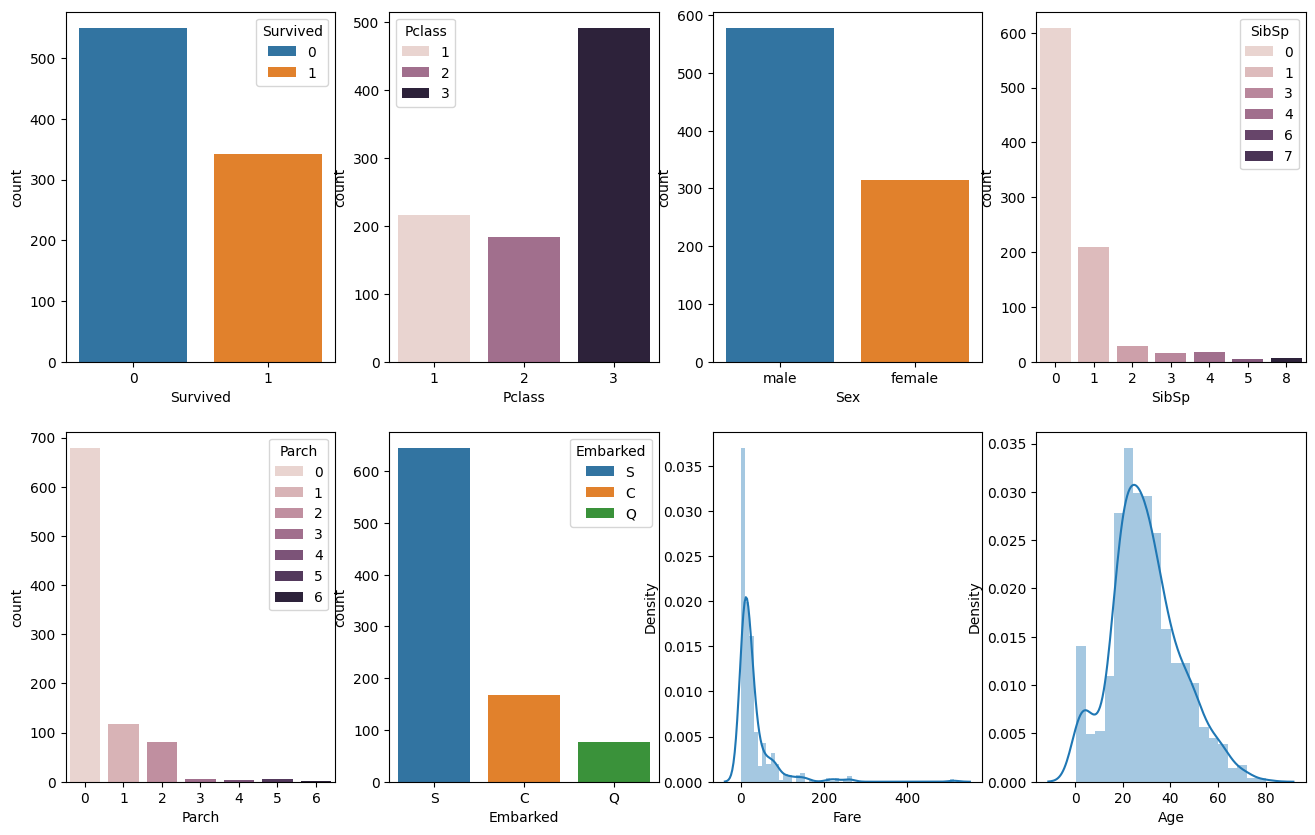

In [405]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='Survived',data=train, ax=axes[0,0],hue='Survived')
sns.countplot(x='Pclass',data=train,ax=axes[0,1], hue='Pclass')
sns.countplot(x='Sex',data=train,ax=axes[0,2],hue='Sex')
sns.countplot(x='SibSp',data=train,ax=axes[0,3],hue='SibSp')
sns.countplot(x='Parch',data=train,ax=axes[1,0],hue='Parch')
sns.countplot(x='Embarked',data=train,ax=axes[1,1], hue='Embarked')
sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

Also number of passengers in labour class that is pclass 3 is higher.
Number of males are higher onboard

#### Bivariate EDA

<Axes: xlabel='Survived', ylabel='Age'>

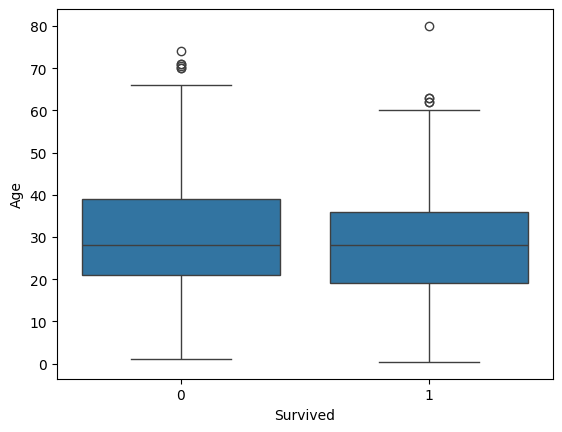

In [406]:
# Box-plot
sns.boxplot(x="Survived", y="Age", data=train)


This box plot compares the Age distribution of passengers who did not survive (0) vs. those who survived (1) on the Titanic. Both groups have outliers, with some passengers over 70 years old. The median age appears similar, but younger passengers seem to have had a slightly higher survival rate.

<Axes: xlabel='Survived', ylabel='Fare'>

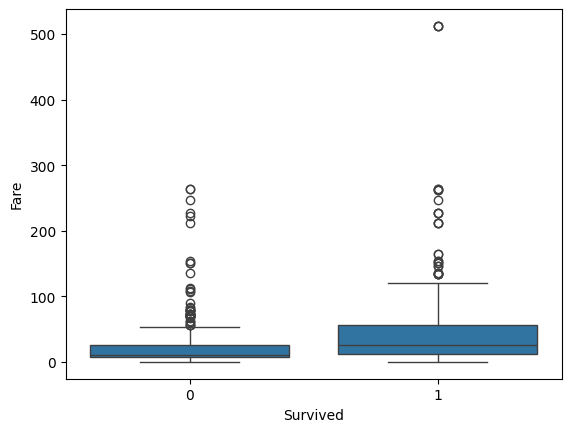

In [407]:
sns.boxplot(x="Survived", y="Fare", data=train)

This **box plot** compares the **Fare distribution** between passengers who **did not survive (0)** and those who **survived (1)**. Survivors generally paid **higher fares**, with some extreme outliers above **$500**, indicating that passengers in **higher classes had a better chance of survival**.

In [408]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

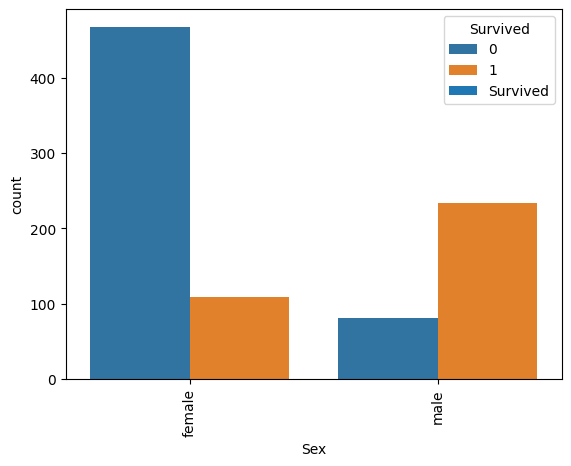

In [409]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot(x='Sex',hue='Survived',data=train)
plt.show()

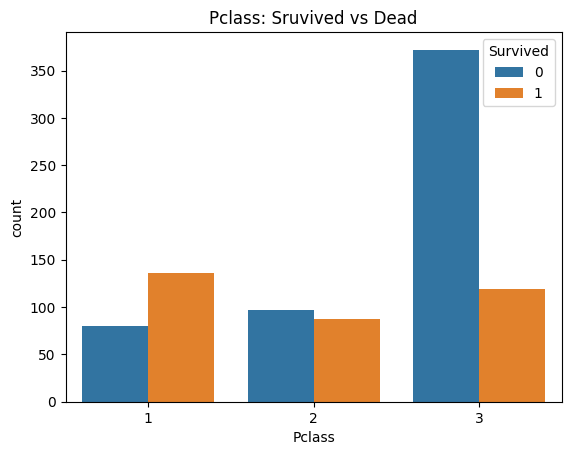

In [410]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

Passangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx. While in Class 1 almost 68% people survived. So money and status matters here.

In [411]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

I used CrossTab here because with these plots categorical variables can easily be visualized. Looking at CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low. From this conclusion, PClass is also a important feature.

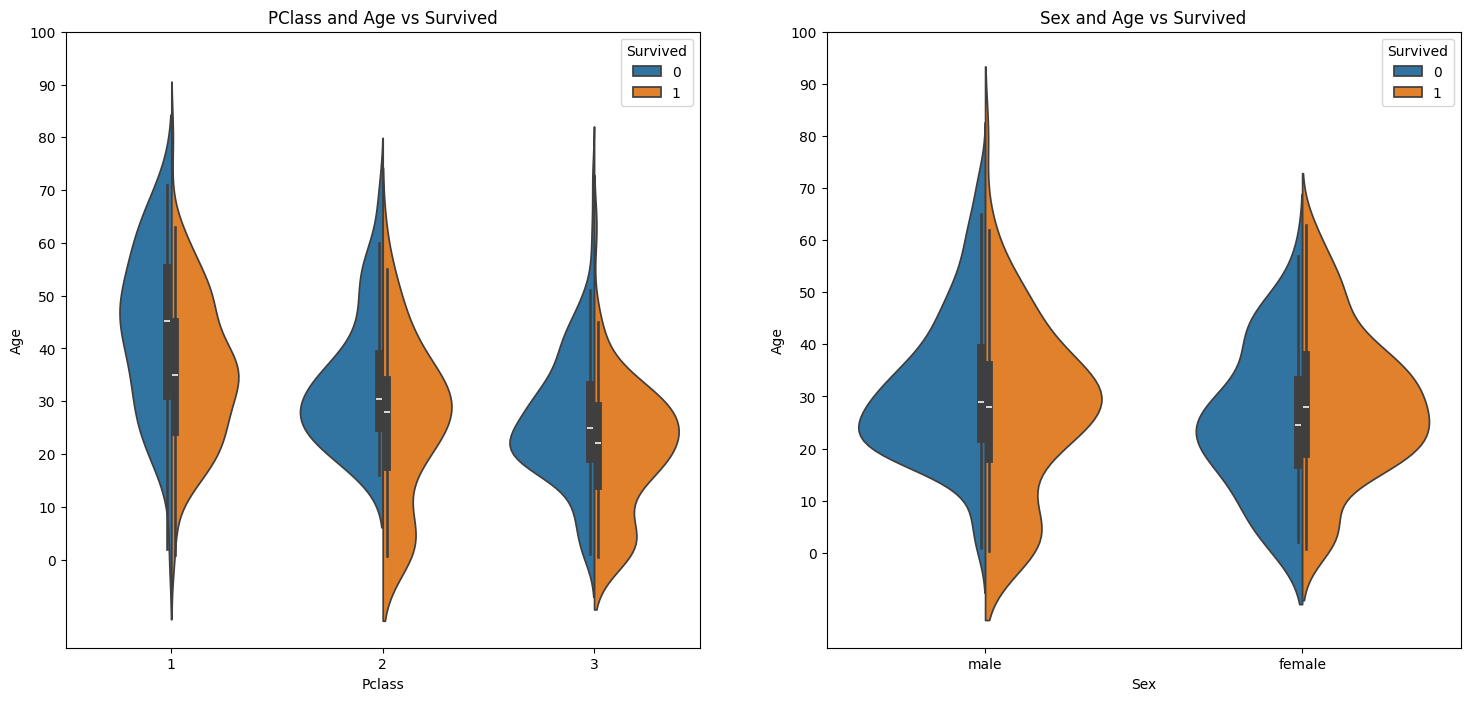

In [412]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived",data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

From above violen plots, following observations are clear,

 1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two.

 2) Survival rate of children, for age 10 and below is good irrespective of Class

 3) Survival rate between age 20-30 is well and is quite better for women.

Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. Let's do something more interesting with dataset by exploring more.

**SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife**

In [413]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


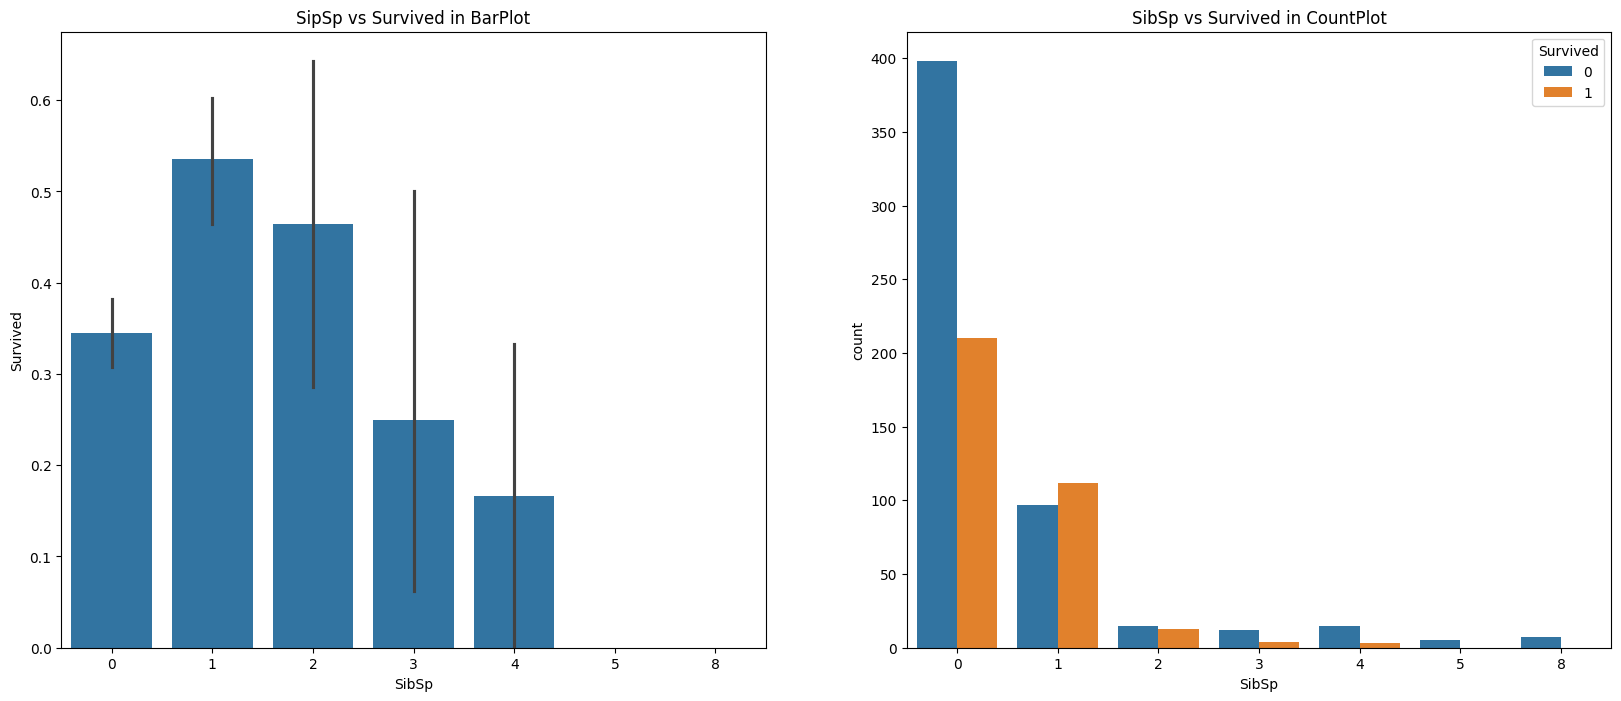

In [414]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived', data=train,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
plt.close(2)
sns.countplot(x='SibSp',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived in CountPlot')
plt.show()

In [415]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


There are many interesting facts with this feature. Barplot and CountPlot shows that if a passanger is alone in ship with no siblings, survival rate is 34.5%. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there's something wrong, the survival rate for families with 5-8 members is 0%. Is this because of PClass? Yes this is PClass, The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

#### Joint Plots(continous vs continous)

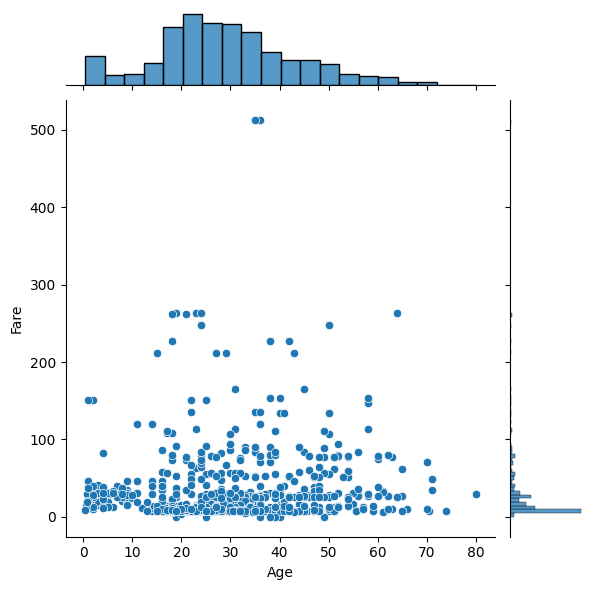

In [416]:
sns.jointplot(x="Age", y="Fare", data=train);

This **scatter plot** shows the relationship between **Age and Fare** on the Titanic. Most passengers paid **low fares**, with a few high-paying outliers, and younger passengers appear more frequent in the dataset.

#### Multivariate EDA
#### Construct a Coorelation matrix of the int64 and float64 feature types

- There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

- There is a negative coorelation between Fare and Pclass, Age and Plcass

<Axes: >

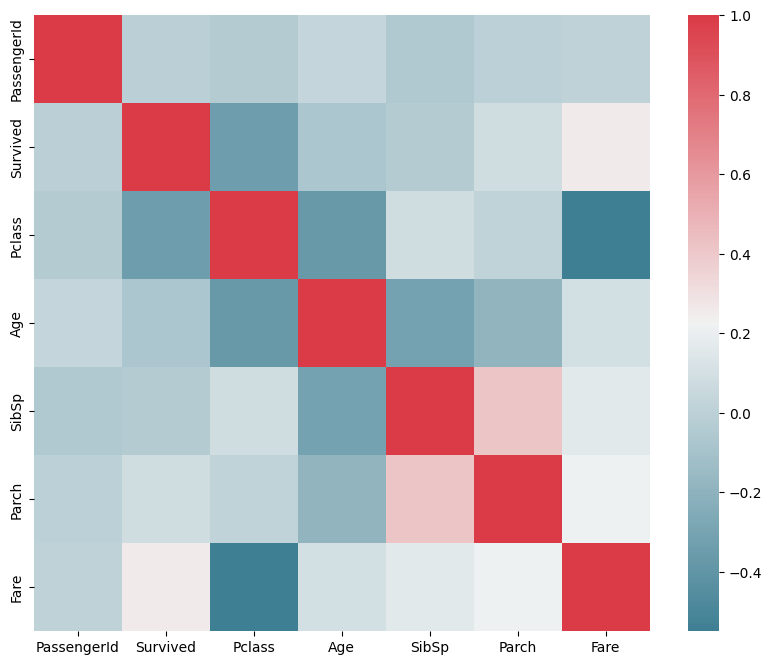

In [417]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train.select_dtypes(include='number').corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Survived vs Age/Fare: You might see a weak correlation between Age and Survived (since age isn't the sole factor for survival). Fare might show a moderate positive correlation with survival since higher fares could indicate higher-class passengers who had better survival rates.

Age and Fare: There could be a moderate positive correlation between Age and Fare, as older passengers may have higher fares.

Pclass and Fare: Pclass has strong correlation with survived because passengers from higher class were given priority

## 6. Feature Engineering Data- Extract title from name, Extract new features from the other features

#### *New Features*

In [418]:
train['FamilyCount']=train.SibSp+train.Parch # Combing SibSp and Parch to get one column which is family count

In [419]:
# Droping SibSp and Parch

train.drop(['SibSp','Parch'],axis=1,inplace=True)

## 7. Data Cleaning

** a. Imput Missing or Zero values to the <span style="color:blue"> Fare variable </span> **

In [420]:
# we see that there are 15 Zero values and its reasonbale
# to flag them as missing values since every ticket
# should have a value greater than 0
print((train.Fare == 0).sum())

15


In [421]:
# mark zero values as missing or NaN
train.Fare = train.Fare.replace(0, np.NaN)

In [422]:
# validate to see if there are no more zero values
print((train.Fare == 0).sum())

0


In [423]:
# keep the index
train[train.Fare.isnull()].index

Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806, 815,
       822],
      dtype='int64')

In [424]:
train.Fare.median()

14.5

#### <span style="color:red">Having missing values in a dataset can cause errors with some machine learning algorithms and either the rows that has missing values should be removed or imputed </span>

Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

>- constant value that has meaning within the domain, such as 0, distinct from all other values.
>- value from another randomly selected record.
>- mean, median or mode value for the column.
>- value estimated by another predictive model.

In [425]:
# impute the missing Fare values with the median Fare value because Fare is a right skewed distribution hence mean can get affected by outliers
train.Fare.fillna(train.Fare.median(),inplace=True)

In [426]:
# validate if any null values are present after the imputation
train.Fare.isnull().sum()

0



** b. Imput Missing or Zero values to the <span style="color:blue"> Age variable </span> **

In [427]:
# we see that there are 0 Zero values
print((train.Age == 0).sum())

0


In [428]:
# impute the missing Age values with the mean age value
train.Age.fillna(train.Age.mean(),inplace=True)

In [429]:
# validate if any null values are present after the imputation
train.Age.isnull().sum()

0

** c. Imput Missing or Zero values to the <span style="color:blue"> Cabin variable </span> **

In [430]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
train.Cabin.isnull().mean()

0.7710437710437711

In [431]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  FamilyCount  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [432]:
# Also we can see columns like ticket number, Name are not goint to contribute in getting prediction hence we will drop these

train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [433]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'FamilyCount'],
      dtype='object')

In [434]:
# drop rows of missing values
train=train.dropna()

In [435]:
# check the datafram has any missing values
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
FamilyCount,0


### Checking outliers using IQR method

In [436]:
# For Age

Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['Age'] < lower_bound) | (train['Age'] > upper_bound)]
outliers['Age']

,Age
7,2.00
11,58.00
15,55.00
16,2.00
33,66.00
...,...
824,2.00
827,1.00
831,0.83
851,74.00


We can see in Age we have ages above 60 as outliers

In [437]:
# For Fare

Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['Fare'] < lower_bound) | (train['Fare'] > upper_bound)]
outliers['Fare']


,Fare
1,71.2833
27,263.0000
31,146.5208
34,82.1708
52,76.7292
...,...
846,69.5500
849,89.1042
856,164.8667
863,69.5500


In [438]:
train[(train['Fare'] < lower_bound)]['Fare']

,Fare


In [439]:
max(outliers['Fare'])

512.3292

In [440]:
min(outliers['Fare'])

66.6

We can see in Fair we don't have outliers in fare in lowerbound, We only have outliers in fare in upper bound hence outliers in fare range from 71 to 512 hence we can say that most people who were onboard on titanic had fare less than 70

In [441]:
# Using Z-Score Method

from scipy.stats import zscore

# Calculate Z-scores for 'Fare' and 'Age'
train['Fare_zscore'] = zscore(train['Fare'])
train['Age_zscore'] = zscore(train['Age'])

# Identify outliers (Z-score > 3 or < -3)
fare_outliers = train[train['Fare_zscore'].abs() > 3]
age_outliers = train[train['Age_zscore'].abs() > 3]

# Display outliers
print("Outliers in Fare:\n", fare_outliers[['Fare', 'Fare_zscore']])
print("Outliers in Age:\n", age_outliers[['Age', 'Age_zscore']])


Outliers in Fare:
          Fare  Fare_zscore
27   263.0000     4.655407
88   263.0000     4.655407
118  247.5208     4.342989
258  512.3292     9.687643
299  247.5208     4.342989
311  262.3750     4.642792
341  263.0000     4.655407
377  211.5000     3.615977
380  227.5250     3.939411
438  263.0000     4.655407
527  221.7792     3.823443
557  227.5250     3.939411
679  512.3292     9.687643
689  211.3375     3.612697
700  227.5250     3.939411
716  227.5250     3.939411
730  211.3375     3.612697
737  512.3292     9.687643
742  262.3750     4.642792
779  211.3375     3.612697
Outliers in Age:
       Age  Age_zscore
96   71.0    3.190057
116  70.5    3.151480
493  71.0    3.190057
630  80.0    3.884444
672  70.0    3.112903
745  70.0    3.112903
851  74.0    3.421519


**Why do outcome differ in IQR and Z-score**

In skewed distributions, IQR might detect outliers in the tail that Z-scores do not, or vice versa, depending on how extreme the skew is.

Z-scores are more sensitive to the mean and standard deviation, which can be influenced by extreme values, leading to different results when the data is not normally distributed.

As dataset here is skewed so we will go with IQR approach

**In this dataset we will not remove outliers because we need that data information instead we will transform them using log transformation to get our distribution less skewed and more normal**

### Log transformation

Log transformation is used to reduce the impact of extreme values (outliers) and to make right-skewed data more normally distributed, improving the performance of many machine learning models.

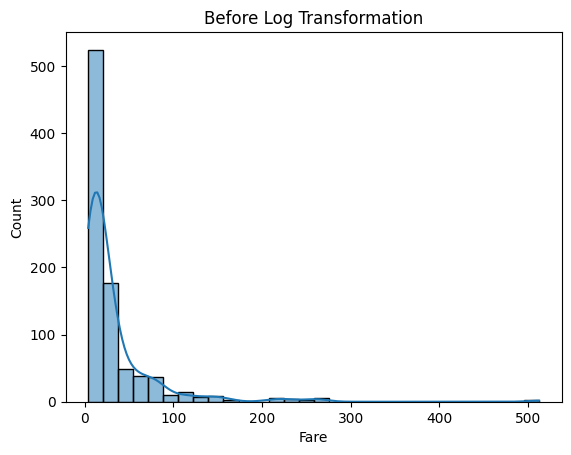

In [442]:
# Before Log transformation

sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Before Log Transformation')
plt.show()

In [443]:
# Log transformation  Fare column

train['Fare'] = np.log1p(train['Fare'])

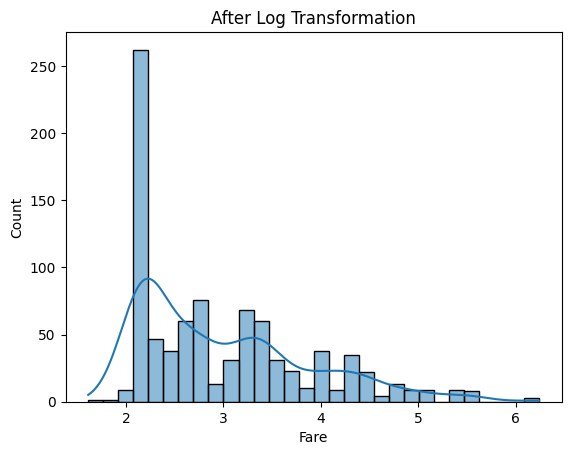

In [444]:
# After log transformation
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('After Log Transformation')
plt.show()

We got little improvement on our graph.

We are not doing log transformation on age as age is already fairly normally distributed

# Encoding

We are going to perform label encoding and one-hot encoding on our categorical column Sex and Embarked

In [445]:
from sklearn.preprocessing import LabelEncoder

# Encode "Sex"
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encode "Embarked"
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
train = train.astype(int)



In [446]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilyCount,Fare_zscore,Age_zscore,Embarked_Q,Embarked_S
0,1,0,3,0,22,2,1,0,0,0,1
1,2,1,1,1,38,4,1,0,0,0,0
2,3,1,3,1,26,2,0,0,0,0,1
3,4,1,1,1,35,3,1,0,0,0,1
4,5,0,3,0,35,2,0,0,0,0,1


# Standardization

**Standardization scales numerical features to have a mean of 0 and a standard deviation of 1, ensuring fair comparisons.** It improves model performance, speeds up gradient descent, and is essential for distance-based models like Linear regression, k-NN, SVM, and PCA. 🚀

In [447]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numerical columns: 'Age' and 'Fare'
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])

# Check the results
print(train[['Age', 'Fare']].head())


        Age      Fare
0 -0.578023 -0.736250
1  0.655371  1.643846
2 -0.269675 -0.736250
3  0.424109  0.453798
4  0.424109 -0.736250


In [448]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilyCount,Fare_zscore,Age_zscore,Embarked_Q,Embarked_S
0,1,0,3,0,-0.578023,-0.736250,1,0,0,0,1
1,2,1,1,1,0.655371,1.643846,1,0,0,0,0
2,3,1,3,1,-0.269675,-0.736250,0,0,0,0,1
3,4,1,1,1,0.424109,0.453798,1,0,0,0,1
4,5,0,3,0,0.424109,-0.736250,0,0,0,0,1


As our data is now clean and processed we are now ready to do Model prediction

In [449]:
# Saving the cleaned dataset for further use
train.to_csv("cleaned_data.csv", index=False)
